In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

#!pip install plotly  for interactive visualization
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [61]:
!pip install jupyterthemes


Defaulting to user installation because normal site-packages is not writeable


In [62]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [63]:
cancer_df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_12844\3084897059.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  cancer_df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


In [64]:
cancer_df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [65]:
cancer_df.tail(20)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
401039,ISIC_9999497,0,IP_4923309,70.0,male,lower extremity,5.00,TBP tile: close-up,3D: XP,24.586915,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999762
401040,ISIC_9999508,0,IP_4942918,55.0,male,lower extremity,2.80,TBP tile: close-up,3D: XP,22.896710,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
401041,ISIC_9999520,0,IP_3751225,75.0,male,upper extremity,4.30,TBP tile: close-up,3D: XP,23.318326,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,96.067637
401042,ISIC_9999539,0,IP_2843614,85.0,male,anterior torso,7.37,TBP tile: close-up,3D: XP,15.833576,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.979264
401043,ISIC_9999596,0,IP_1117889,55.0,female,upper extremity,4.86,TBP tile: close-up,3D: XP,18.705245,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,88.724822
401044,ISIC_9999665,0,IP_8083655,60.0,female,anterior torso,2.74,TBP tile: close-up,3D: white,23.023290,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.998570
401045,ISIC_9999678,0,IP_9724369,55.0,male,lower extremity,3.26,TBP tile: close-up,3D: XP,17.055580,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.498130
401046,ISIC_9999696,0,IP_9553357,55.0,male,anterior torso,6.33,TBP tile: close-up,3D: XP,19.489550,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999990
401047,ISIC_9999762,0,IP_6569660,65.0,male,anterior torso,3.09,TBP tile: close-up,3D: white,15.752300,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.921420
401048,ISIC_9999779,0,IP_1117889,55.0,female,lower extremity,4.36,TBP tile: close-up,3D: XP,19.441287,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.995005


In [66]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [67]:
cancer_df.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [68]:
cancer_df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [69]:
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [70]:
cancer_df.isnull()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False
401055,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False
401056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False
401057,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False


<Axes: >

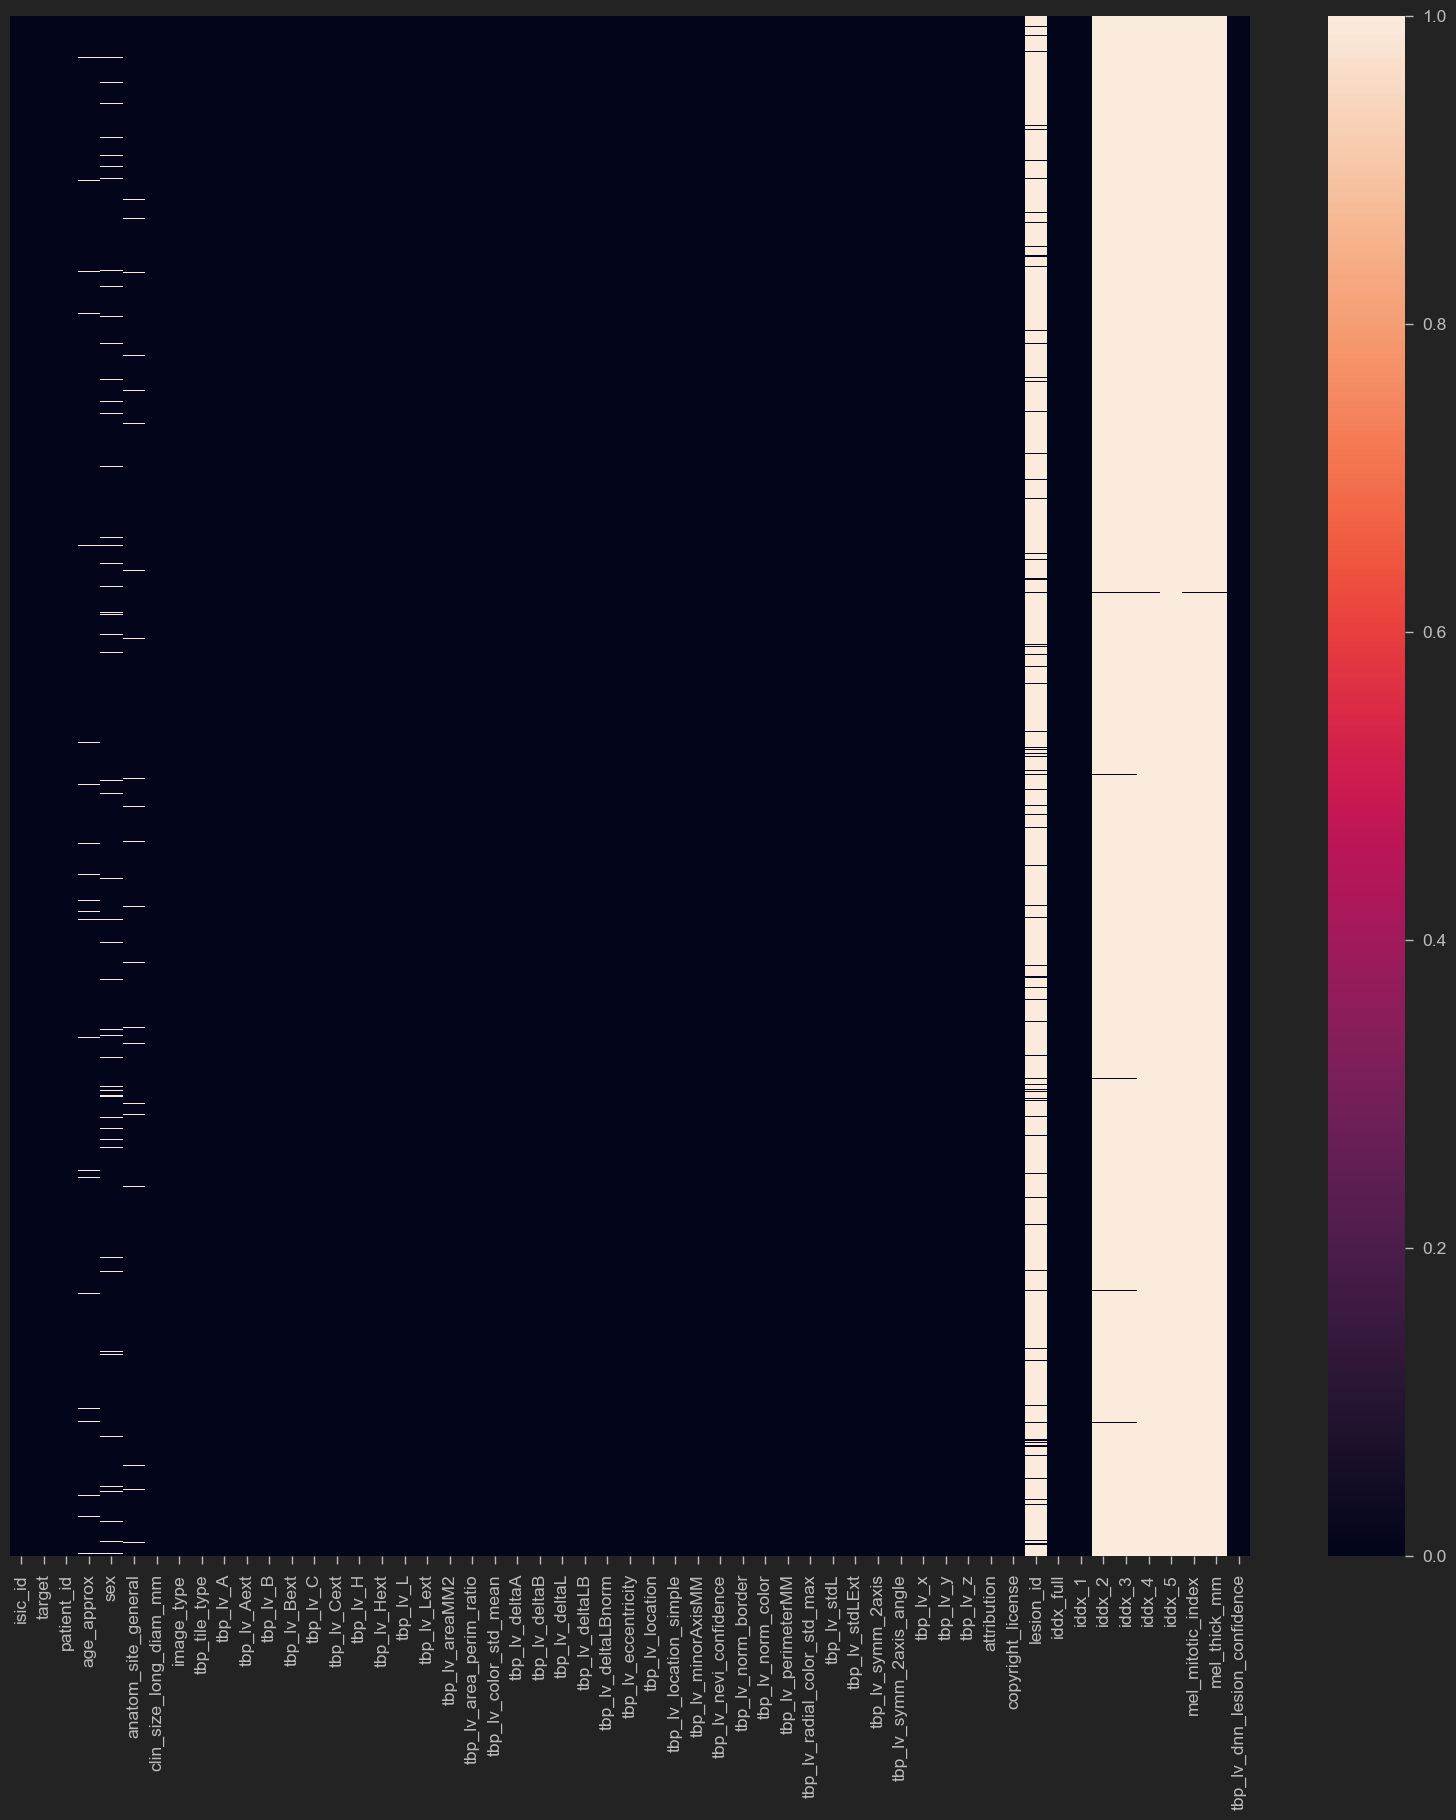

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

In [72]:
# Get data frame info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [73]:
cancer_df = cancer_df.drop(columns=['image_type'])


In [74]:
print(cancer_df.columns.tolist())


['isic_id', 'target', 'patient_id', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']


In [75]:
cancer_df.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [76]:
print(cancer_df.dtypes)


isic_id                          object
target                            int64
patient_id                       object
age_approx                      float64
sex                              object
anatom_site_general              object
clin_size_long_diam_mm          float64
tbp_tile_type                    object
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
tbp_lv_deltaLB                  float64


In [77]:
cancer_df.mean(numeric_only=True)


target                             0.000980
age_approx                        58.012986
clin_size_long_diam_mm             3.930827
tbp_lv_A                          19.974007
tbp_lv_Aext                       14.919247
tbp_lv_B                          28.281706
tbp_lv_Bext                       26.913015
tbp_lv_C                          34.786341
tbp_lv_Cext                       30.921279
tbp_lv_H                          54.653689
tbp_lv_Hext                       60.996869
tbp_lv_L                          42.289976
tbp_lv_Lext                       51.199529
tbp_lv_areaMM2                     8.539975
tbp_lv_area_perim_ratio           19.084517
tbp_lv_color_std_mean              1.070408
tbp_lv_deltaA                      5.054760
tbp_lv_deltaB                      1.368691
tbp_lv_deltaL                     -8.909552
tbp_lv_deltaLB                     9.455766
tbp_lv_deltaLBnorm                 7.538922
tbp_lv_eccentricity                0.741238
tbp_lv_minorAxisMM              

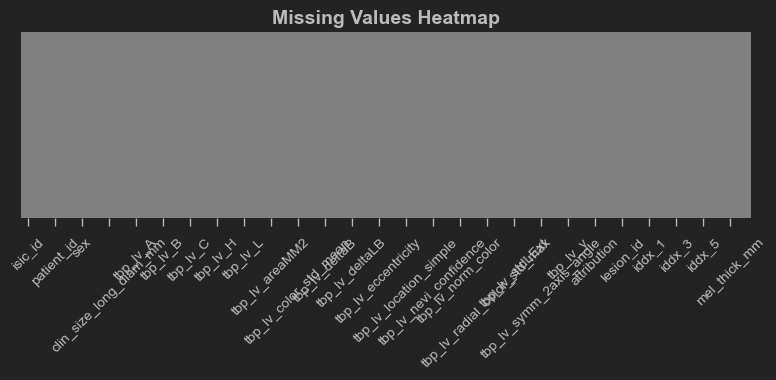

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))  # ছোট ও সুন্দর layout
sns.heatmap(cancer_df.isnull(),
            cmap='YlOrRd',         # light to bold color
            cbar=False,
            yticklabels=False,
            linewidths=0.5,
            linecolor='gray')

plt.title("Missing Values Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [82]:
cancer_df['age_approx'].min()

5.0

In [83]:
cancer_df['age_approx'].max()

85.0

In [84]:
cancer_df[cancer_df['age_approx'] ==64]

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence


In [85]:
# শুধু numeric columns নিয়ে correlation বের করা
corr_matrix = cancer_df.select_dtypes(include=['float64', 'int64']).corr()
print(corr_matrix)

                                target  age_approx  clin_size_long_diam_mm  \
target                        1.000000    0.007734                0.032682   
age_approx                    0.007734    1.000000                0.016160   
clin_size_long_diam_mm        0.032682    0.016160                1.000000   
tbp_lv_A                      0.019788   -0.010769               -0.043167   
tbp_lv_Aext                   0.023206    0.121040               -0.075178   
tbp_lv_B                     -0.026366   -0.087802               -0.118330   
tbp_lv_Bext                  -0.013711   -0.062579               -0.037388   
tbp_lv_C                     -0.009431   -0.069054               -0.108182   
tbp_lv_Cext                  -0.000807   -0.008615               -0.056407   
tbp_lv_H                     -0.044884   -0.074416               -0.069811   
tbp_lv_Hext                  -0.032671   -0.168048                0.048127   
tbp_lv_L                     -0.004053   -0.077823              

In [86]:
cancer_df_cleaned = cancer_df.select_dtypes(exclude=['object'])
corr_matrix = cancer_df_cleaned.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

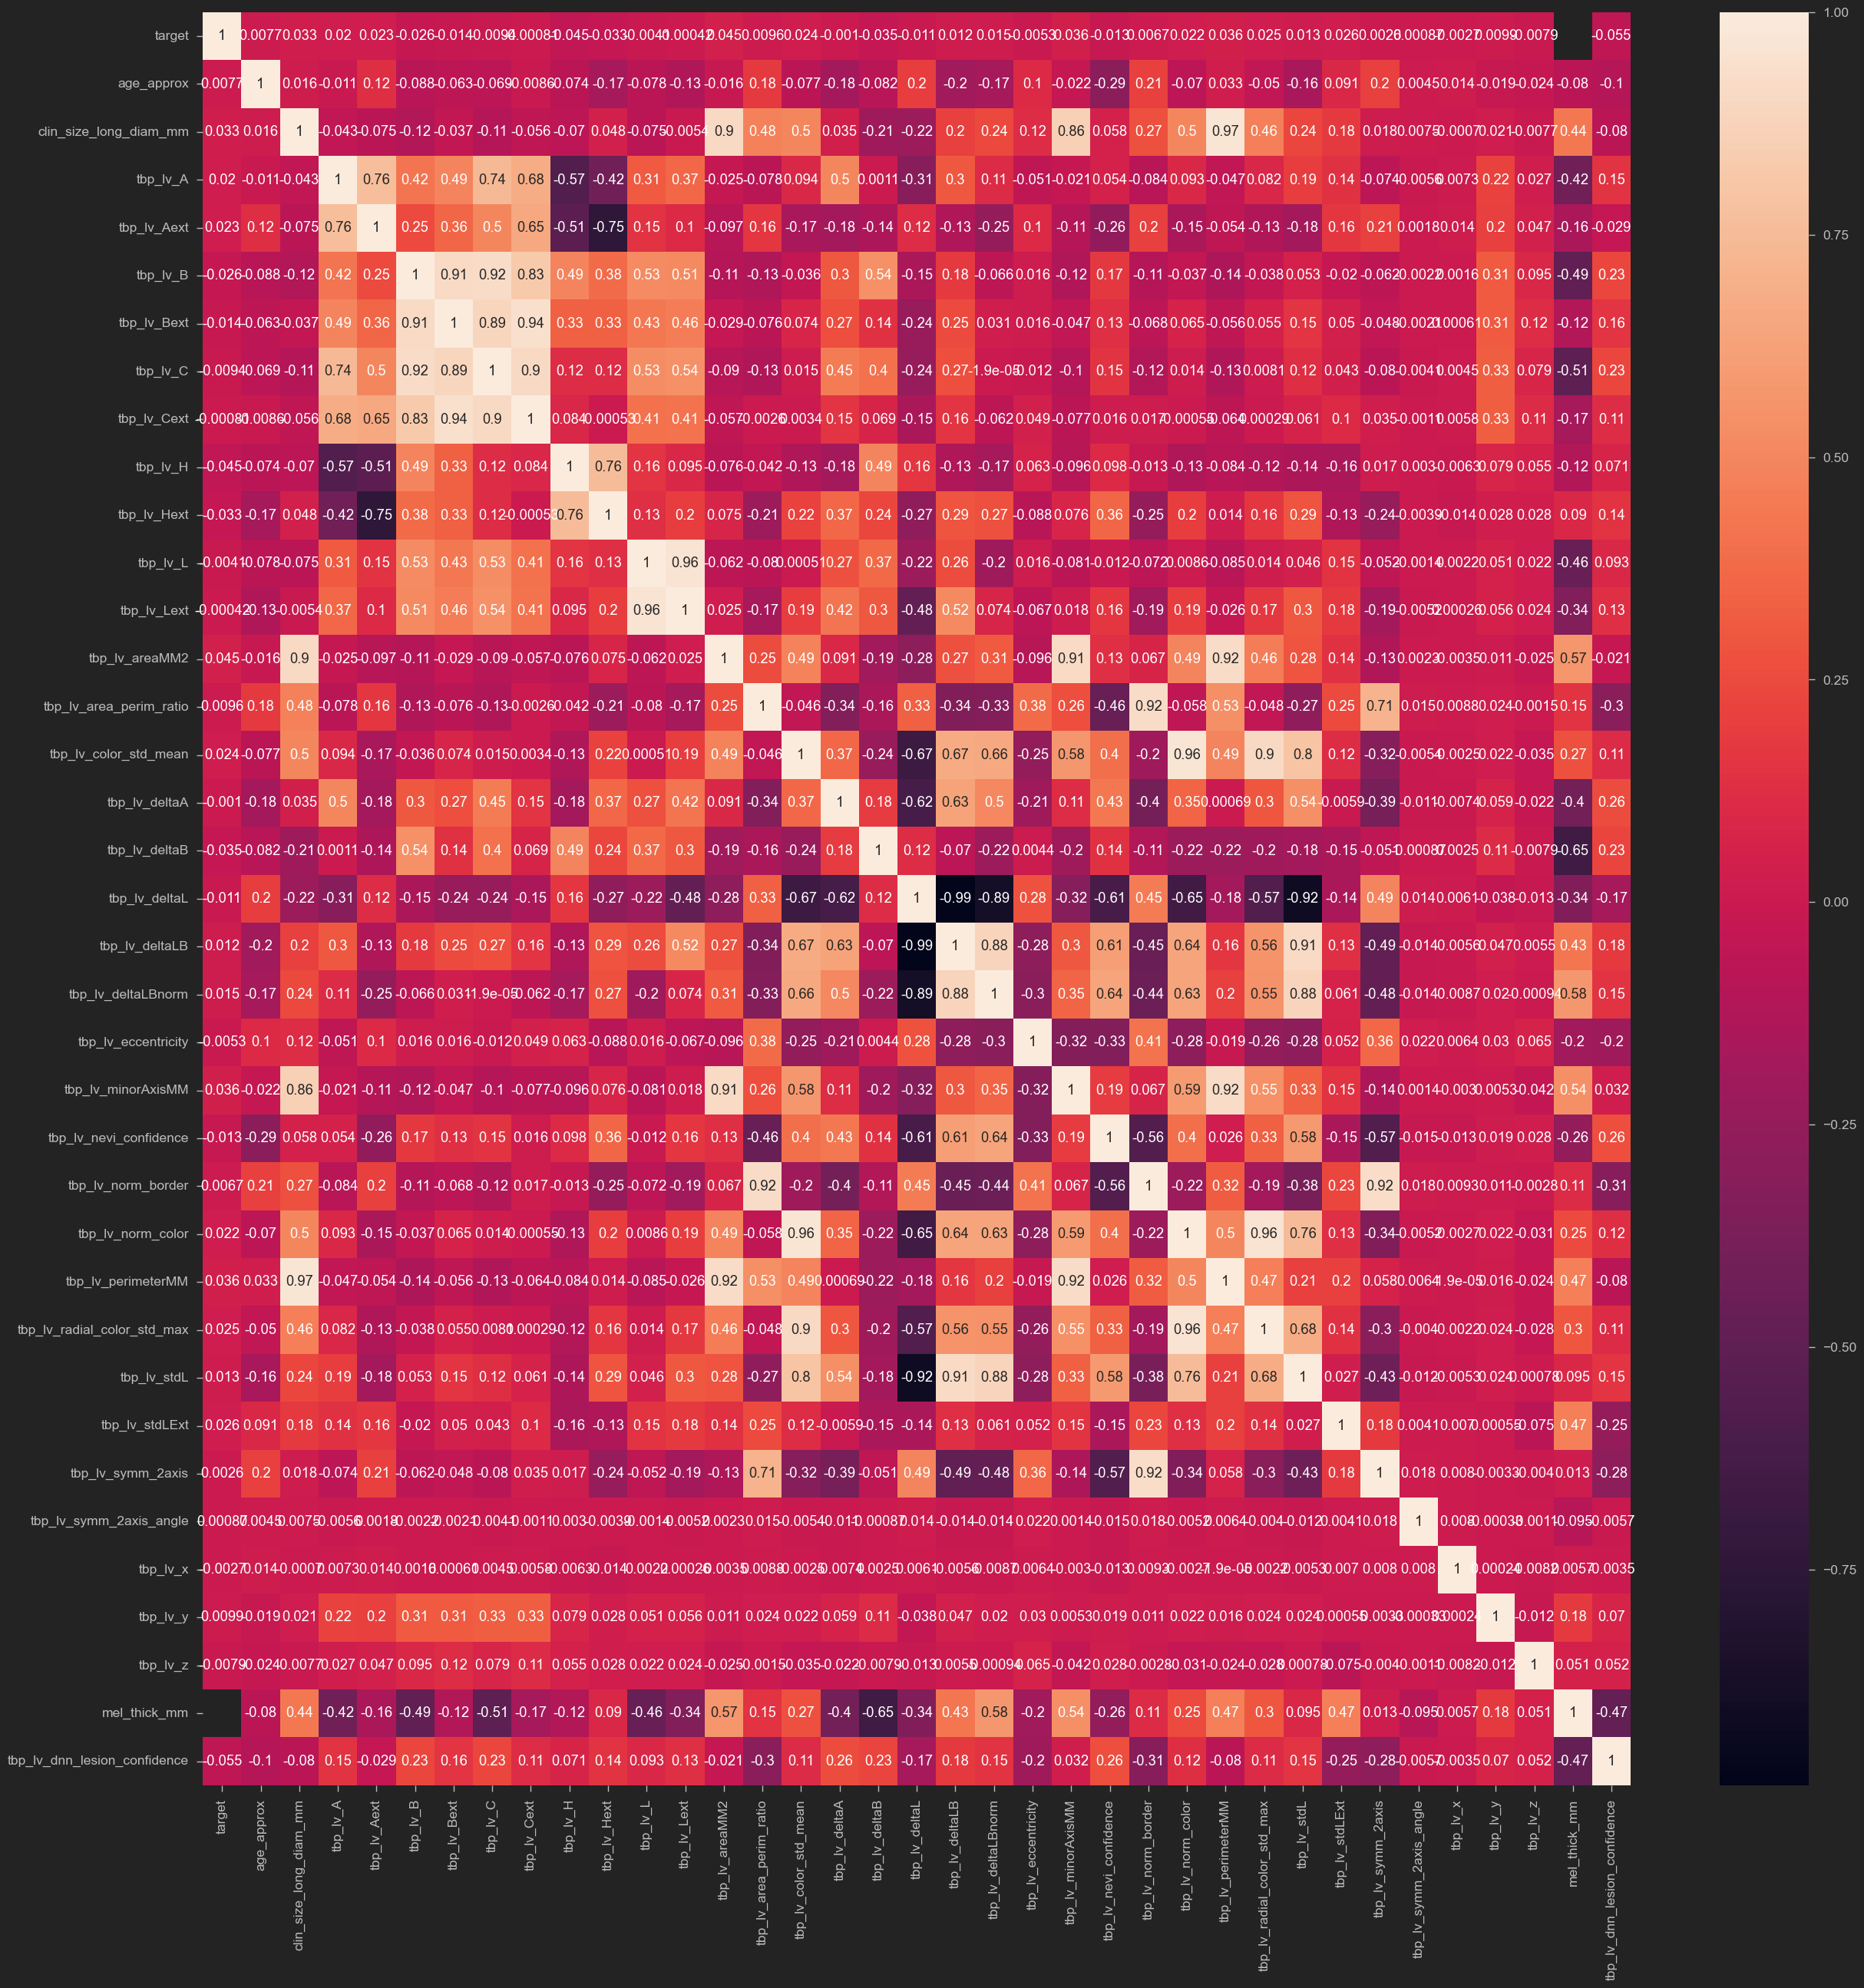

In [87]:
plt.figure(figsize= (30,30))
sns.heatmap(corr_matrix, annot =True)
plt.show

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'age_approx'}>,
        <Axes: title={'center': 'clin_size_long_diam_mm'}>,
        <Axes: title={'center': 'tbp_lv_A'}>,
        <Axes: title={'center': 'tbp_lv_Aext'}>,
        <Axes: title={'center': 'tbp_lv_B'}>],
       [<Axes: title={'center': 'tbp_lv_Bext'}>,
        <Axes: title={'center': 'tbp_lv_C'}>,
        <Axes: title={'center': 'tbp_lv_Cext'}>,
        <Axes: title={'center': 'tbp_lv_H'}>,
        <Axes: title={'center': 'tbp_lv_Hext'}>,
        <Axes: title={'center': 'tbp_lv_L'}>],
       [<Axes: title={'center': 'tbp_lv_Lext'}>,
        <Axes: title={'center': 'tbp_lv_areaMM2'}>,
        <Axes: title={'center': 'tbp_lv_area_perim_ratio'}>,
        <Axes: title={'center': 'tbp_lv_color_std_mean'}>,
        <Axes: title={'center': 'tbp_lv_deltaA'}>,
        <Axes: title={'center': 'tbp_lv_deltaB'}>],
       [<Axes: title={'center': 'tbp_lv_deltaL'}>,
        <Axes: title={'center': 'tbp_lv_delta

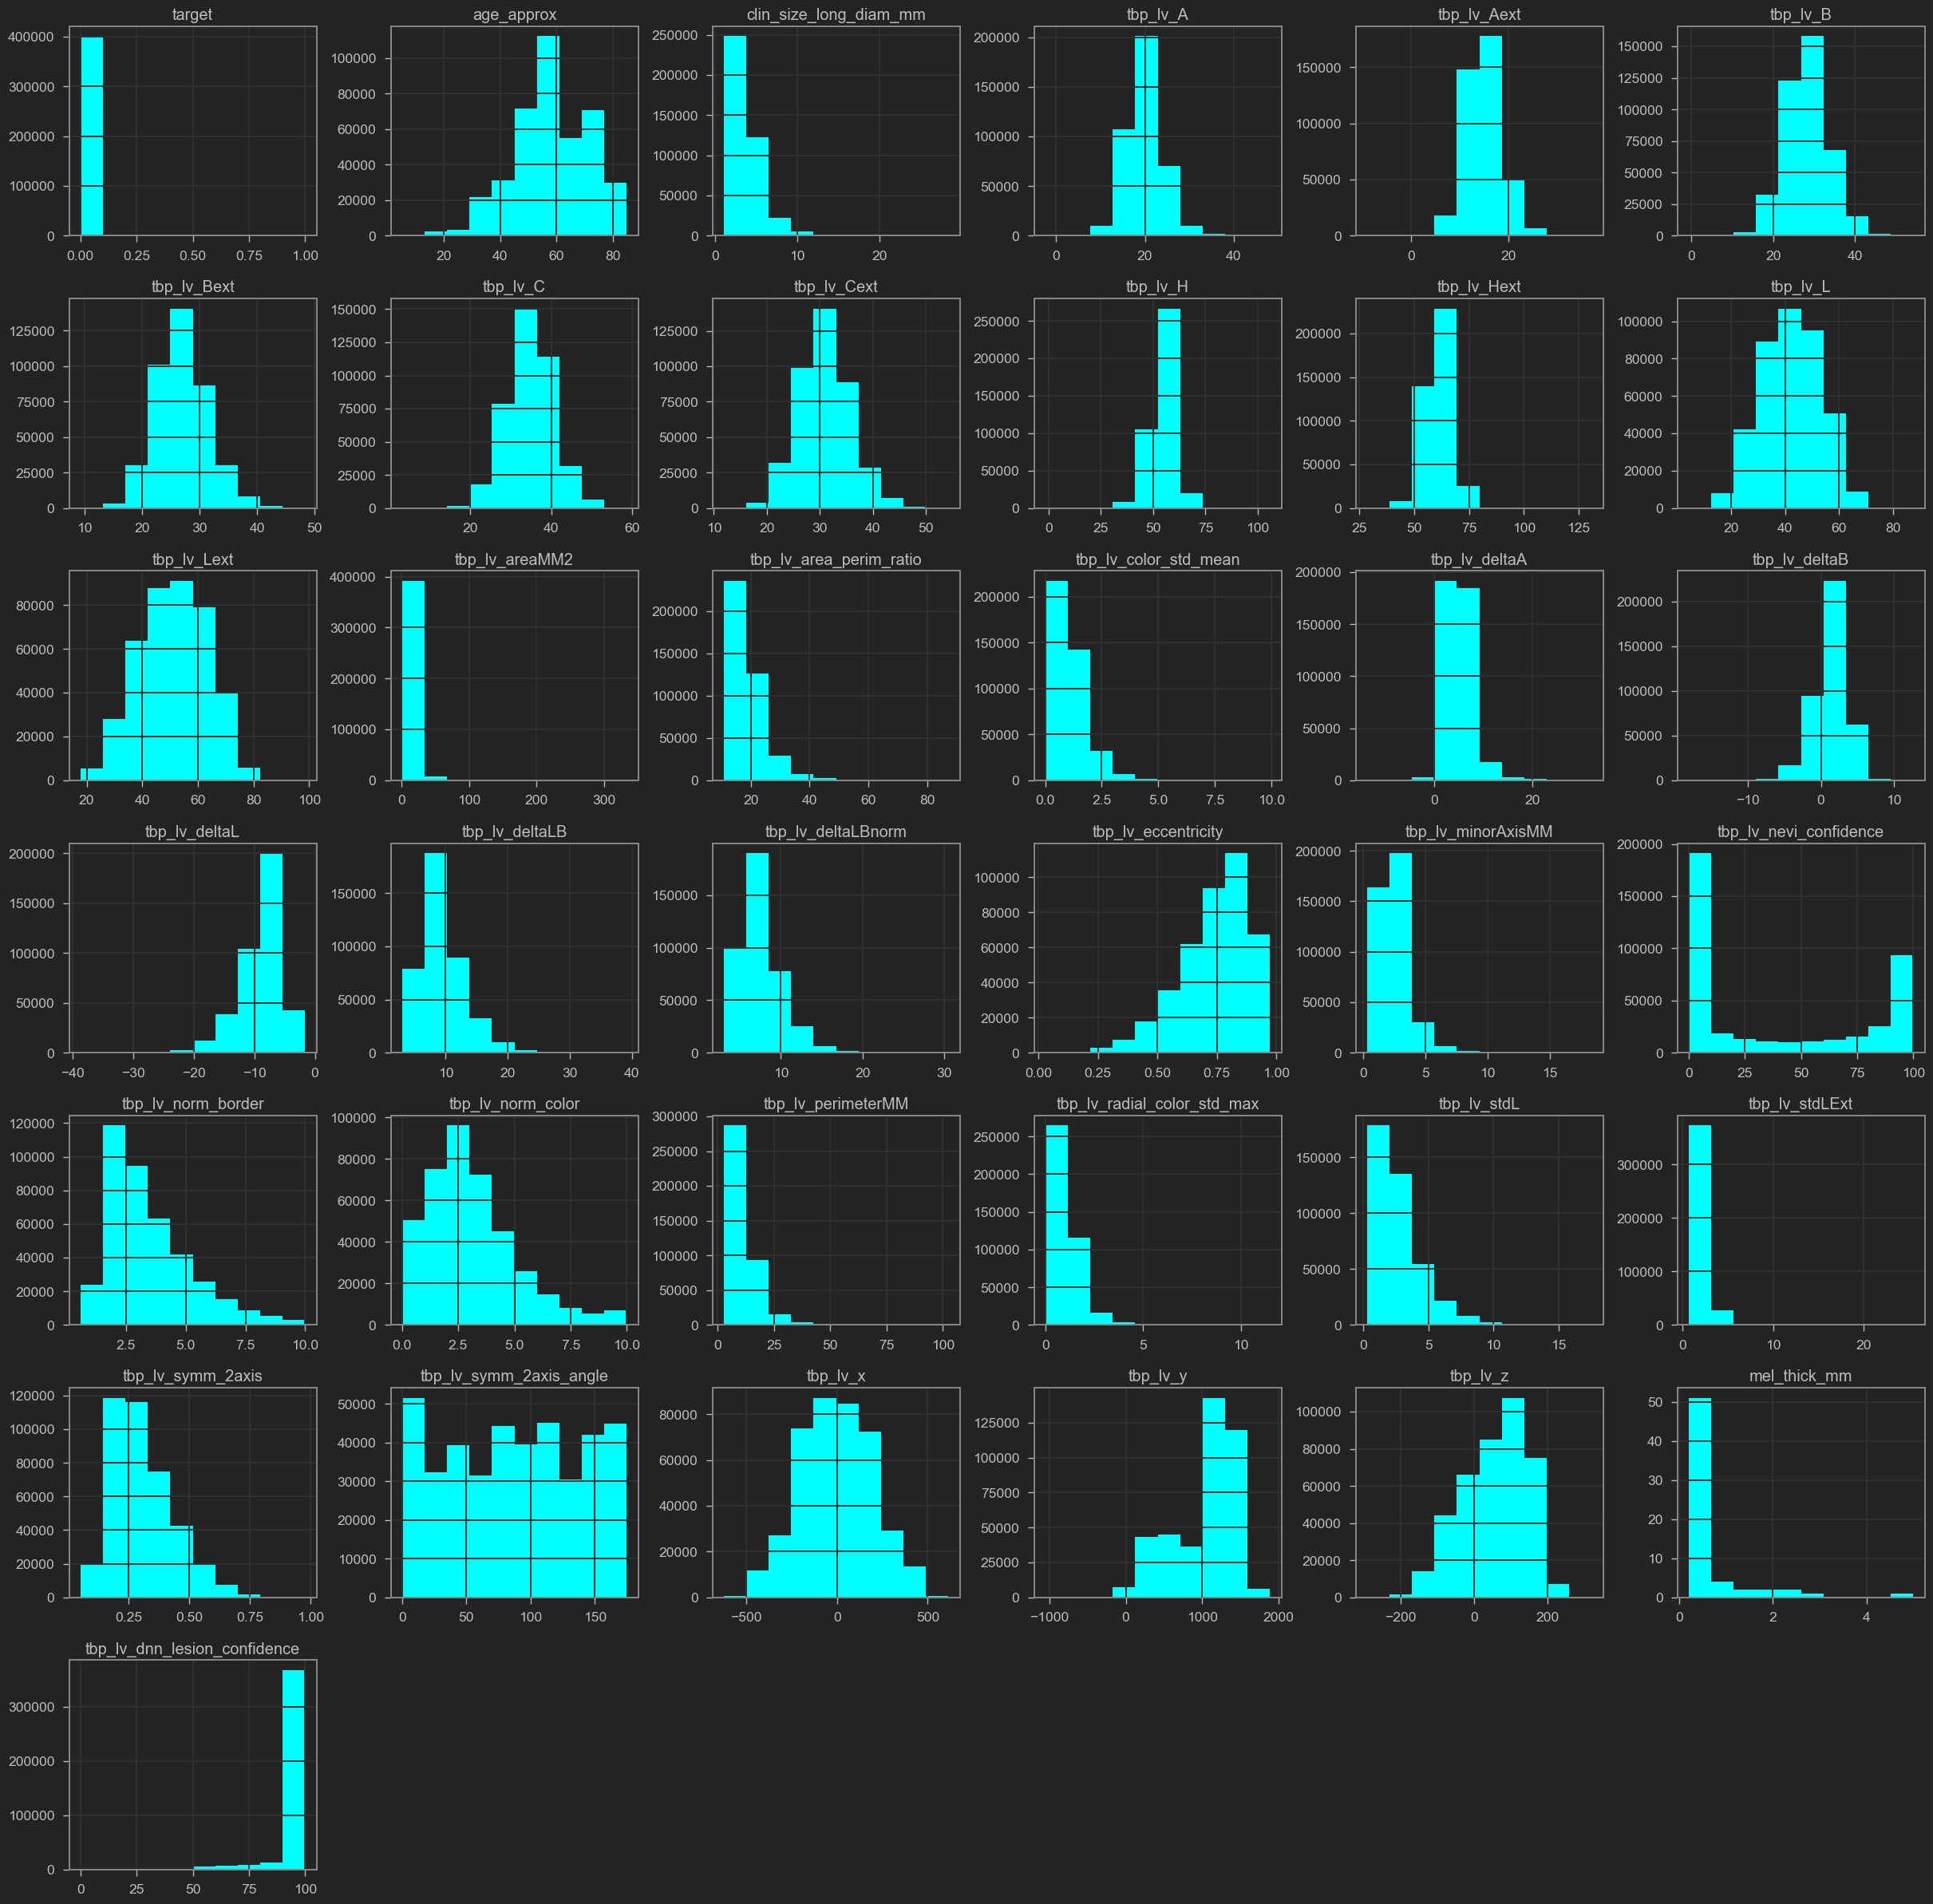

In [88]:
cancer_df.hist(bins = 10, figsize= (30,30), color ='cyan')

In [89]:
cancer_df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,3D: white,20.244422,16.261975,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,3D: white,31.712570,25.364740,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,3D: XP,22.575830,17.128170,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,3D: XP,14.242329,12.164757,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,3D: white,24.725520,20.057470,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,3D: XP,22.574335,14.944666,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,3D: white,19.977640,16.026870,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,3D: XP,17.332567,12.364397,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,3D: XP,22.288570,9.564721,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [90]:
target_df = cancer_df['age_approx']
input_df = cancer_df.drop(columns=['age_approx'])


In [91]:
input_df.shape

(401059, 53)

In [92]:
from sklearn.preprocessing import LabelEncoder
input_df_numeric = cancer_df.select_dtypes(include=['int64', 'float64'])

# dx column এ Label Encoding প্রয়োগ করা
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cancer_df['age_approx'])

# data কে array তে convert করা
X = np.array(input_df_numeric).astype('float32')
y = np.array(y).astype('float32')


In [93]:
y.shape

(401059,)

In [94]:
input_df.shape

(401059, 53)

In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
X

array([[ -0.03131879,   0.14614534,  -0.51106906, ...,  -1.1168969 ,
                 nan,   0.03947151],
       [ -0.03131879,   0.14614534,  -1.6240503 , ...,   0.01535909,
                 nan, -10.451661  ],
       [ -0.03131879,   0.14614534,  -0.30453637, ...,   2.0130641 ,
                 nan,   0.29367524],
       ...,
       [ -0.03131879,   0.5138966 ,  -1.0790336 , ...,  -1.8490461 ,
                 nan,   0.31539363],
       [ -0.03131879,  -2.060362  ,  -0.6487574 , ...,  -1.5097002 ,
                 nan,   0.31545892],
       [ -0.03131879,  -0.58935714,  -0.36190665, ...,   0.589841  ,
                 nan,   0.3154547 ]], dtype=float32)

In [97]:
# প্রথমে ডেটা থেকে train, validation, test আলাদা করে ফেলুন
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 of 0.8 = 0.2

# ফলে: train = 60%, val = 20%, test = 20%


In [98]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240635, 37)
(240635,)
(80212, 37)
(80212,)


In [99]:
model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=10,
    base_score=0.5  # এই লাইনটা add করো
)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [100]:
print("Train labels:", pd.Series(y_train).unique())
print("Test labels:", pd.Series(y_test).unique())


Train labels: [ 8.  7. 10.  9. 11. 14. 13.  6. 12.  4. 16.  5. 15.  2.  3.  1.  0.]
Test labels: [ 9.  6. 15. 12.  8. 13. 10.  4. 14.  7. 11.  5.  1. 16.  2.  3.]


In [107]:
# Train an XGBoost classifier model 
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [108]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [109]:
result_train = model.score(X_train, y_train)
result_train

0.9999958443285474

In [110]:
result_test = model.score(X_test, y_test)
result_test

1.0

In [111]:
y_predict = model.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       123
         2.0       1.00      1.00      1.00       331
         3.0       1.00      1.00      1.00       705
         4.0       1.00      1.00      1.00      2093
         5.0       1.00      1.00      1.00      2256
         6.0       1.00      1.00      1.00      6330
         7.0       1.00      1.00      1.00      4717
         8.0       1.00      1.00      1.00      9598
         9.0       1.00      1.00      1.00     11573
        10.0       1.00      1.00      1.00     10752
        11.0       1.00      1.00      1.00     11064
        12.0       1.00      1.00      1.00      7993
        13.0       1.00      1.00      1.00      6176
        14.0       1.00      1.00      1.00      4201
        15.0       1.00      1.00      1.00      1730
        16.0       1.00      1.00      1.00       570

    accuracy                           1.00     80212
   macro avg       1.00   

<Axes: >

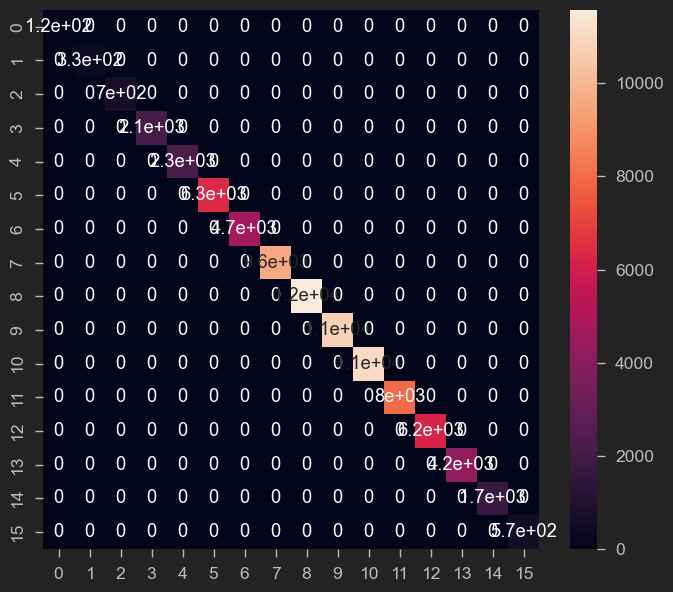

In [113]:
cm = confusion_matrix (y_predict, y_test)
sns.heatmap(cm, annot=True)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 50, n_estimators = 100)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [115]:
result_train2 = model.score(X_train, y_train)
result_train2

0.9999968832496486

In [116]:
# predict the score of the trained model using the testing dataset
result_test2 = model.score(X_test, y_test)
result_test2

1.0

In [117]:
y_predict2 = model.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       141
         2.0       1.00      1.00      1.00       326
         3.0       1.00      1.00      1.00       692
         4.0       1.00      1.00      1.00      2071
         5.0       1.00      1.00      1.00      2311
         6.0       1.00      1.00      1.00      6254
         7.0       1.00      1.00      1.00      4796
         8.0       1.00      1.00      1.00      9644
         9.0       1.00      1.00      1.00     11538
        10.0       1.00      1.00      1.00     10834
        11.0       1.00      1.00      1.00     10949
        12.0       1.00      1.00      1.00      7865
        13.0       1.00      1.00      1.00      6190
        14.0       1.00      1.00      1.00      4249
        15.0       1.00      1.00      1.00      1766
        16.0       1.00      1.00      1.00       586

    accuracy                           1.00     80212
   macro avg       1.00   

<Axes: >

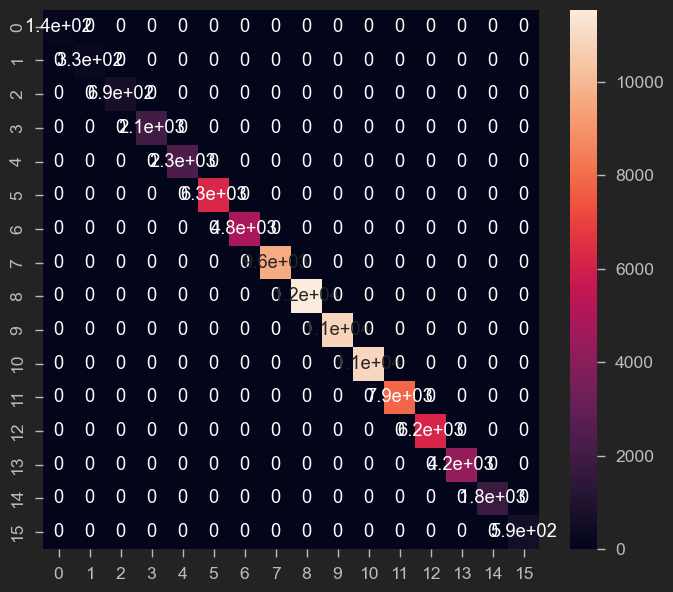

In [119]:
cm = confusion_matrix (y_predict2, y_test)
sns.heatmap(cm, annot=True)

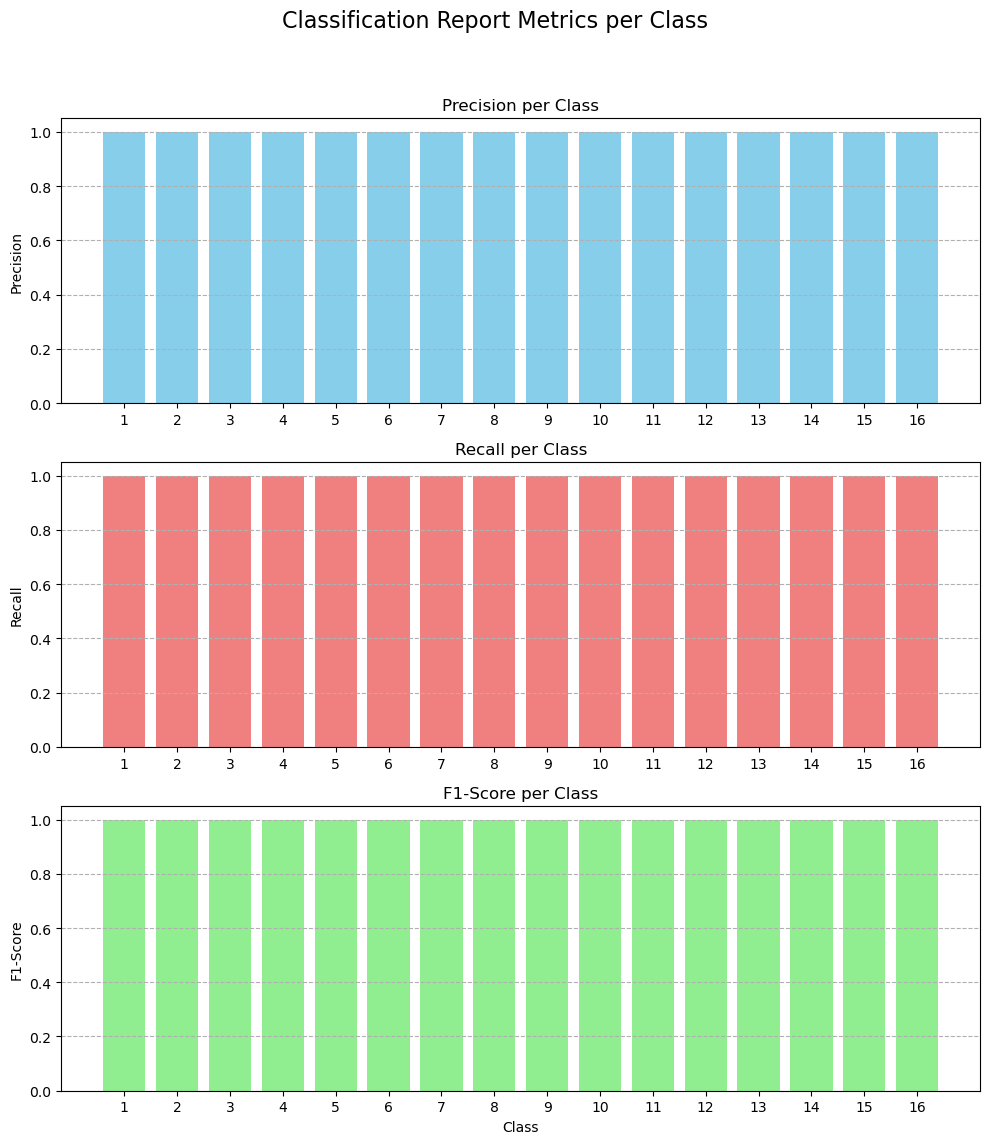

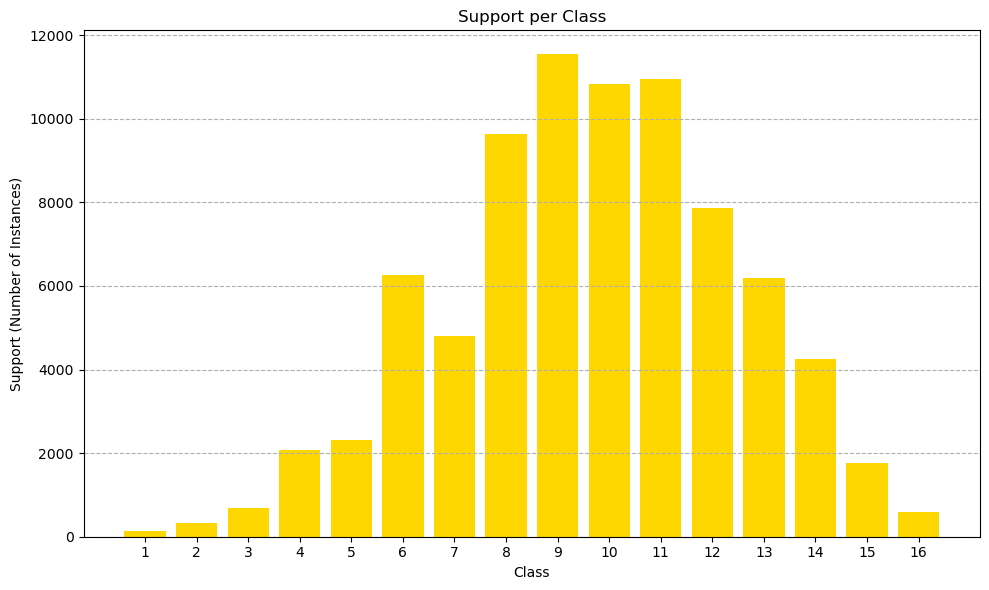

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Provided classification report data
classes = np.arange(1, 17)
precision = np.ones(16)
recall = np.ones(16)
f1_score = np.ones(16)
support = np.array([141, 326, 692, 2071, 2311, 6254, 4796, 9644, 11538, 10834, 10949, 7865, 6190, 4249, 1766, 586])

# Set up the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle('Classification Report Metrics per Class', fontsize=16)

# Plot Precision
axs[0].bar(classes, precision, color='skyblue')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision per Class')
axs[0].set_xticks(classes)
axs[0].grid(axis='y', linestyle='--')

# Plot Recall
axs[1].bar(classes, recall, color='lightcoral')
axs[1].set_ylabel('Recall')
axs[1].set_title('Recall per Class')
axs[1].set_xticks(classes)
axs[1].grid(axis='y', linestyle='--')

# Plot F1-Score
axs[2].bar(classes, f1_score, color='lightgreen')
axs[2].set_ylabel('F1-Score')
axs[2].set_title('F1-Score per Class')
axs[2].set_xlabel('Class')
axs[2].set_xticks(classes)
axs[2].grid(axis='y', linestyle='--')

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

# Optional: Plot Support
plt.figure(figsize=(10, 6))
plt.bar(classes, support, color='gold')
plt.ylabel('Support (Number of Instances)')
plt.xlabel('Class')
plt.title('Support per Class')
plt.xticks(classes)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15064\3997877504.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', n_classes)


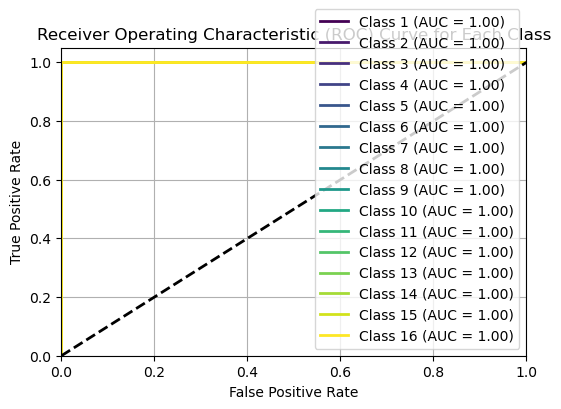

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming you have binary classification in the backend for each class
# (one-vs-rest approach if it's multi-class)
n_classes = 16
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # In a real scenario, you would have the true labels (y_true) and
    # probability predictions for each class (y_prob).
    # Since the report shows perfect classification, let's simulate ideal scores.
    # For a perfect classifier:
    fpr[i] = np.array([0.0, 0.0, 1.0])
    tpr[i] = np.array([0.0, 1.0, 1.0])
    roc_auc[i] = 1.0

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
colors = plt.cm.get_cmap('viridis', n_classes)

for i, color in zip(range(n_classes), colors(np.linspace(0, 1, n_classes))):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()